In [1]:
import cv2
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import numpy as np

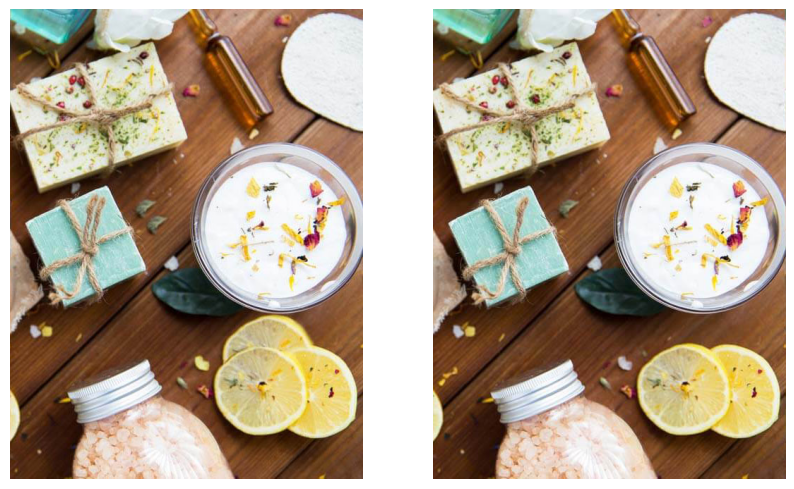

In [14]:
img_L = Image.open('imgs/02_L.jpg')
img_R = Image.open('imgs/02_R.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()

# or .axis('off')
 
axes[0].imshow(img_L)
axes[1].imshow(img_R)
plt.show()

## Pillow ImageOperations Difference

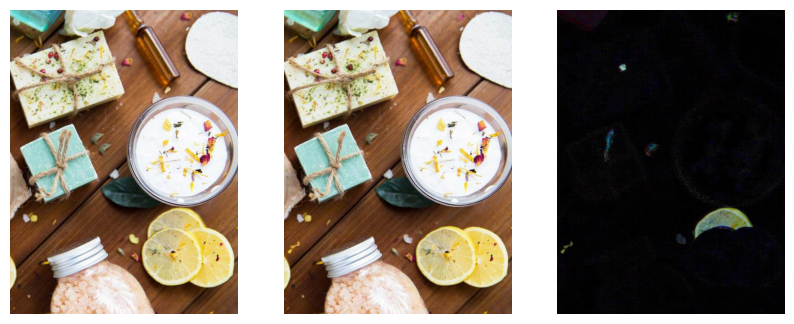

In [18]:
diff = ImageChops.difference(img_L, img_R)

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

axes[0].imshow(img_L)
axes[1].imshow(img_R)
axes[2].imshow(diff)

plt.show()

## Structural Similarity

[Image Quality Assessment: From Error Visibility to Structural Similarity (2004, Zhou Wang et al.)](https://www.researchgate.net/publication/3327793_Image_Quality_Assessment_From_Error_Visibility_to_Structural_Similarity)

Structural similarity: 91.99%


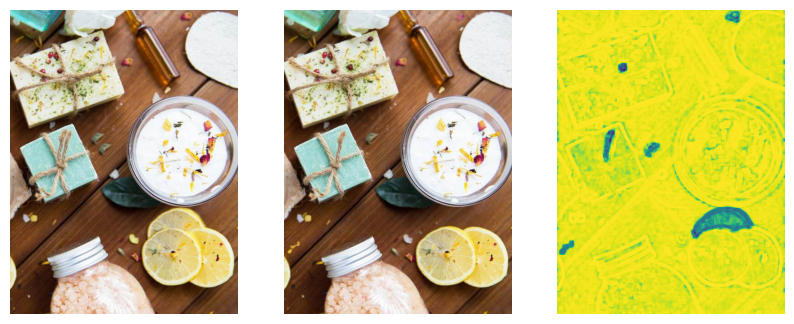

In [19]:
from skimage.metrics import structural_similarity

img_L_np = np.array(img_L)
img_R_np = np.array(img_R)

img_L_gray = cv2.cvtColor(img_L_np, cv2.COLOR_RGB2GRAY)
img_R_gray = cv2.cvtColor(img_R_np, cv2.COLOR_RGB2GRAY)

score, diff = structural_similarity(img_L_gray, img_R_gray, full=True)

print('Structural similarity: %.2f%%' % (score * 100,))

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

axes[0].imshow(img_L)
axes[1].imshow(img_R)
axes[2].imshow(diff)

plt.show()

## OpenCV Absolute Difference

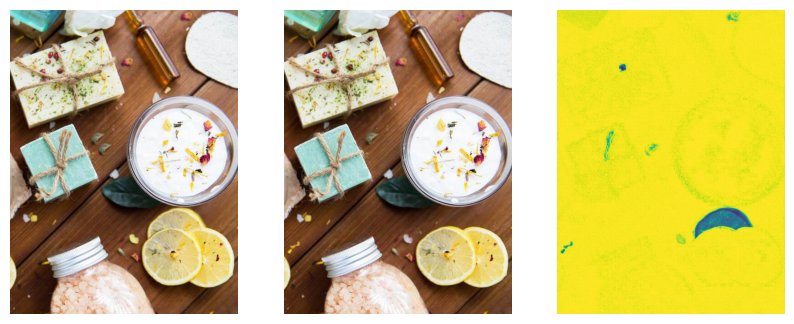

In [20]:
diff = 255 - cv2.absdiff(img_L_gray, img_R_gray)

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

axes[0].imshow(img_L)
axes[1].imshow(img_R)
axes[2].imshow(diff)

plt.show()

## Otsu's Thresholding

https://en.wikipedia.org/wiki/Otsu%27s_method

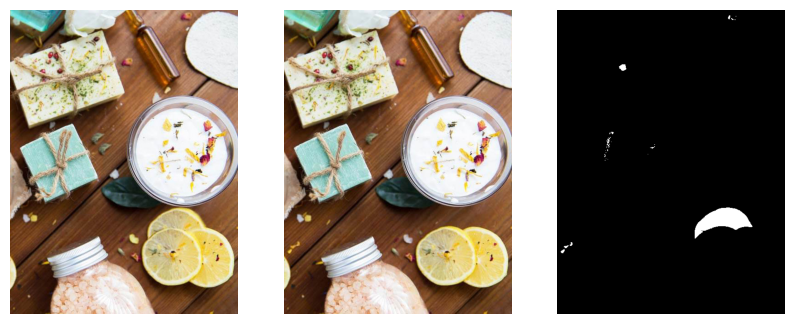

In [24]:
# diff = (diff * 255).astype('uint8')
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


fig, axes = plt.subplots(1, 3, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

axes[0].imshow(img_L)
axes[1].imshow(img_R)
axes[2].imshow(thresh, cmap='gray')

plt.show()

## Visualize with bounding boxes

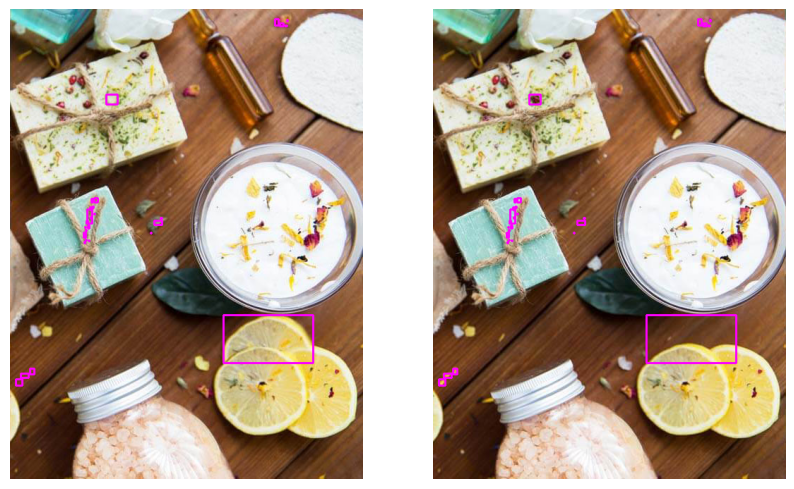

In [25]:
import imutils

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

img_L_result = img_L_np.copy()
img_R_result = img_R_np.copy()

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    cv2.rectangle(img_L_result, (x, y), (x + w, y + h), (255, 0, 255), 2)
    cv2.rectangle(img_R_result, (x, y), (x + w, y + h), (255, 0, 255), 2)
    
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].set_axis_off()
axes[1].set_axis_off()

axes[0].imshow(img_L_result)
axes[1].imshow(img_R_result)

plt.show()

## Generate a Gif Image

In [9]:
from IPython.display import Image as Img
from IPython.display import display

img_L.save('out.gif', save_all=True, append_images=[img_R], loop=0, duration=500)

display(Img(url='out.gif'))

## Reference

- https://www.geeksforgeeks.org/spot-the-difference-between-two-images-using-python/
- https://www.youtube.com/watch?v=MeybrIbM0N4
- https://stackoverflow.com/questions/56183201/detect-and-visualize-differences-between-two-images-with-opencv-python
- https://pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/
- https://www.boredpanda.com/quiz-spot-the-differences-images-langweiledich/